# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [8]:
df=pd.read_csv('housing.csv')

In [9]:
df.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
# we need to assign the feature names given above

features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRAITIO','B','LSTAT','MEDV']

In [10]:
df.columns=features

In [11]:
df.shape

(505, 14)

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAITIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      505 non-null    float64
 1   ZN        505 non-null    float64
 2   INDUS     505 non-null    float64
 3   CHAS      505 non-null    int64  
 4   NOX       505 non-null    float64
 5   RM        505 non-null    float64
 6   AGE       505 non-null    float64
 7   DIS       505 non-null    float64
 8   RAD       505 non-null    int64  
 9   TAX       505 non-null    int64  
 10  PTRAITIO  505 non-null    float64
 11  B         505 non-null    float64
 12  LSTAT     505 non-null    float64
 13  MEDV      505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [15]:
df.shape

(505, 14)

In [19]:
df.size

7070

In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAITIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS          int64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX           int64
PTRAITIO    float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [26]:
df.isnull().sum().sum()

0

# The Data Prepration for Linear Regression



1. Remove OutLiers

2. Remove Colinearity

3. Linear Assumption 

4. Gaussian Distribution 

5. Standardization or Normalization (Rescaling inputs)



## see the distribution for 

#### Dependent and independent variables

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

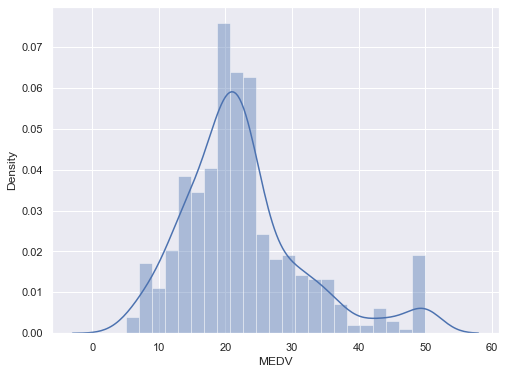

In [132]:
#Distribution for the dependent Variable MEDV
plt.figure(figsize=(8,6))
sns.distplot(df['MEDV'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

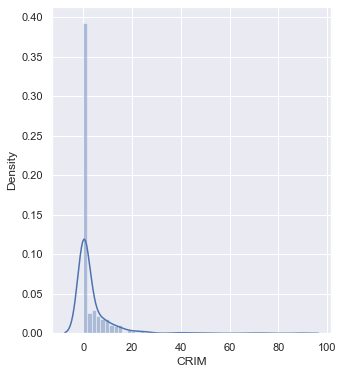

In [135]:
# Distributin for the independent variables one by one

plt.figure(figsize=(5,6))
sns.distplot(df['CRIM'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ZN', ylabel='Density'>

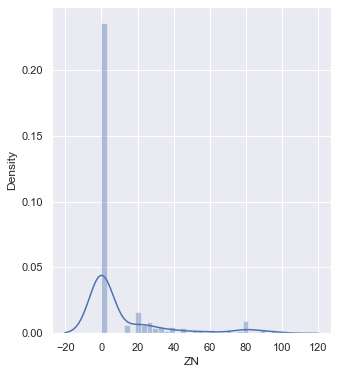

In [136]:
plt.figure(figsize=(5,6))
sns.distplot(df['ZN'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INDUS', ylabel='Density'>

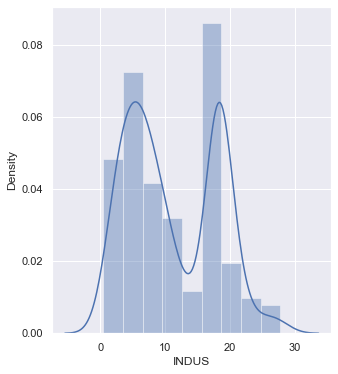

In [137]:
plt.figure(figsize=(5,6))
sns.distplot(df['INDUS'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHAS', ylabel='Density'>

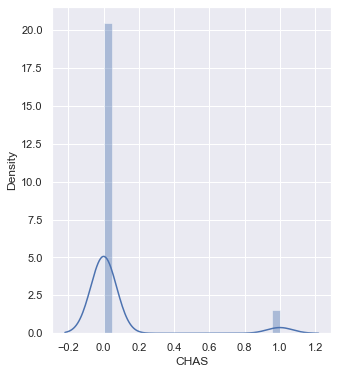

In [138]:
plt.figure(figsize=(5,6))
sns.distplot(df['CHAS'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOX', ylabel='Density'>

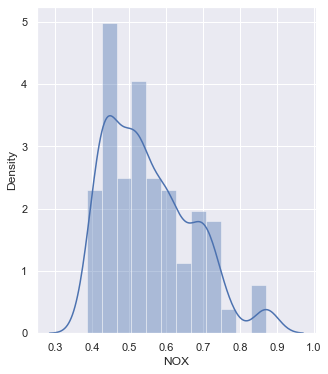

In [139]:
plt.figure(figsize=(5,6))
sns.distplot(df['NOX'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

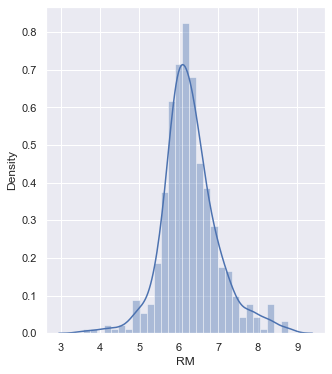

In [140]:
plt.figure(figsize=(5,6))
sns.distplot(df['RM'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

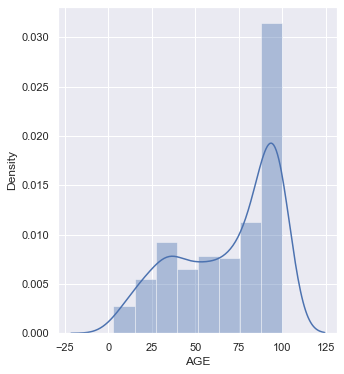

In [141]:
plt.figure(figsize=(5,6))
sns.distplot(df['AGE'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIS', ylabel='Density'>

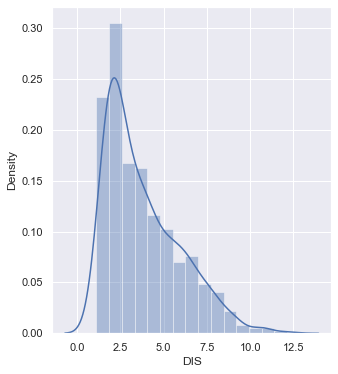

In [142]:
plt.figure(figsize=(5,6))
sns.distplot(df['DIS'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RAD', ylabel='Density'>

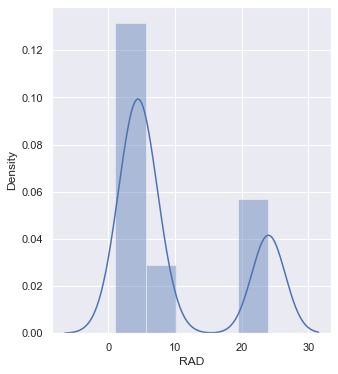

In [148]:
plt.figure(figsize=(5,6))
sns.distplot(df['RAD'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAX', ylabel='Density'>

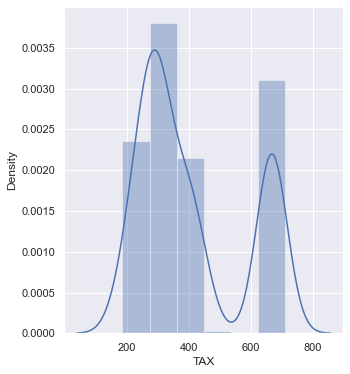

In [144]:
plt.figure(figsize=(5,6))
sns.distplot(df['TAX'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PTRAITIO', ylabel='Density'>

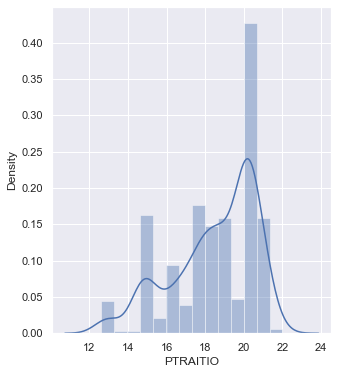

In [145]:
plt.figure(figsize=(5,6))
sns.distplot(df['PTRAITIO'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B', ylabel='Density'>

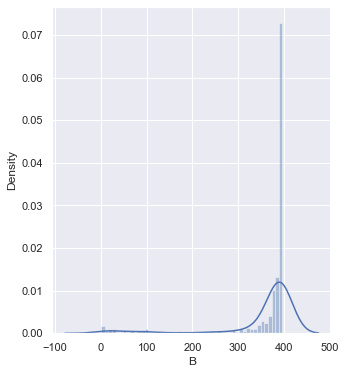

In [146]:
plt.figure(figsize=(5,6))
sns.distplot(df['B'])

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

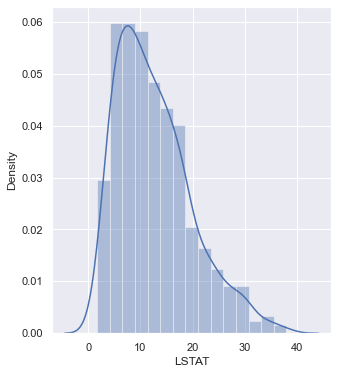

In [147]:
plt.figure(figsize=(5,6))
sns.distplot(df['LSTAT'])

2. Remove Colinearity--
Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated


to check the colinearity we will use corr() function and heatmap to plot the corelation matrix

<AxesSubplot:>

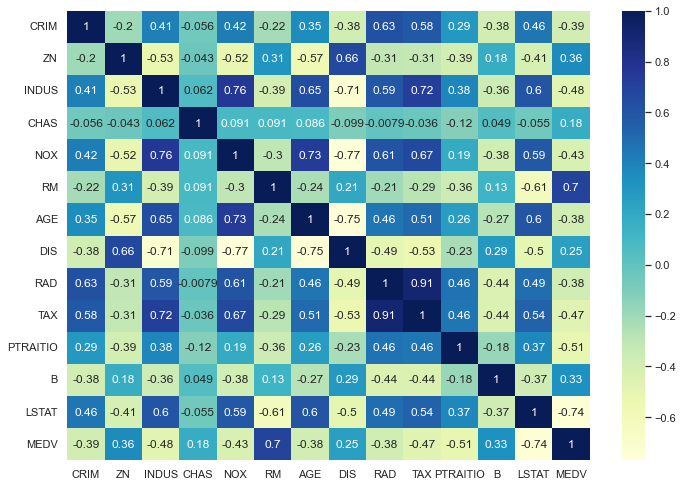

In [150]:
cor_=df.corr()
sns.heatmap(cor_,annot=True,cmap="YlGnBu")

#### The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

#### To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).


##### An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.


from the above corelation matrix we can say that the features  RM HAS POSSITIVE CORRELATION and LSTAT HAS HIGH NEGATIVE CORELATION are highly corelated with the target variable MEDV


the feature PTRAITIO is also showing -0.51 corelation with MEDV we need to plot and see weather they are having linear relation between dependent and each independent and highly correlated features using scatter plot



### next scatter plot between selected correlated variables RM LSTAT AND PTRAITIO

3. 
#### Linear Assumption-
Linear regression assumes that the relationship between your independent and dependent is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).we can also observe that the features RAD AND TAX




## Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>

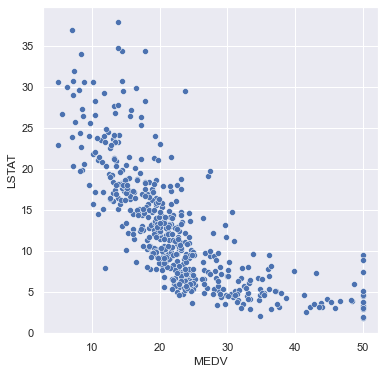

In [153]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.MEDV,y=df.LSTAT)

# WE CAN observe that there is a linear relationship exist but they are having negative corelation see in the heatmap and 
# same can be observe in the scatter plot also

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

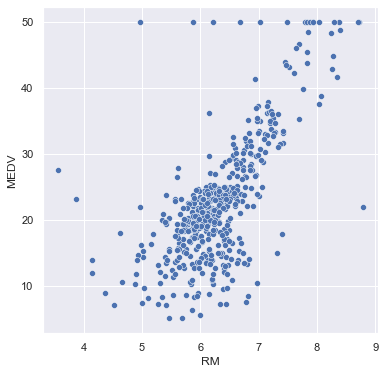

In [155]:
plt.figure(figsize=(6,6))
sns.scatterplot(y=df.MEDV,x=df.RM)

# it is possitive correlation and same can be seen in heatmap and in the scatterplot

<AxesSubplot:xlabel='MEDV', ylabel='PTRAITIO'>

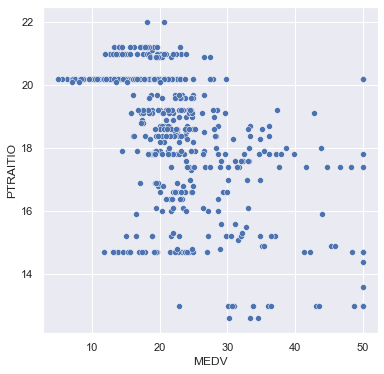

In [156]:
# THOUGH IT IS SHOWING STRONG CORELATION WITH THE MEDV BUT THERE NO LINEAR RELATION EXIST BETWEEN THE TWO FEATURES HENCE WE WILL
# NOT INCLUDE THE PTRATIO IN FURTHER ANALYSIS
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.MEDV,y=df.PTRAITIO)

1. Remove OutLiers-- Linear regression assumes that your independent and dependent variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible


need to check for the outliers in the selected features like MEDV, RM, LSTAT

C:\Users\d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

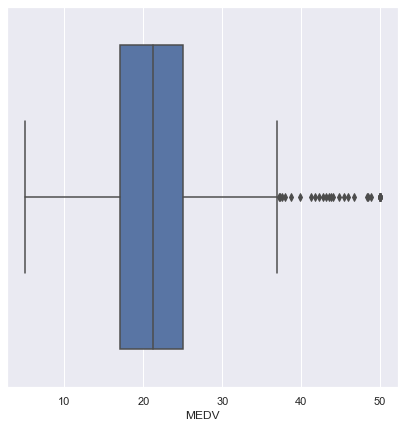

In [157]:
plt.figure(figsize=(7,7))
sns.boxplot(df.MEDV)

C:\Users\d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

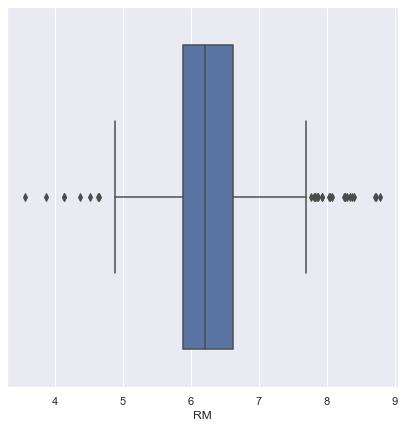

In [158]:
plt.figure(figsize=(7,7))
sns.boxplot(df.RM)

C:\Users\d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

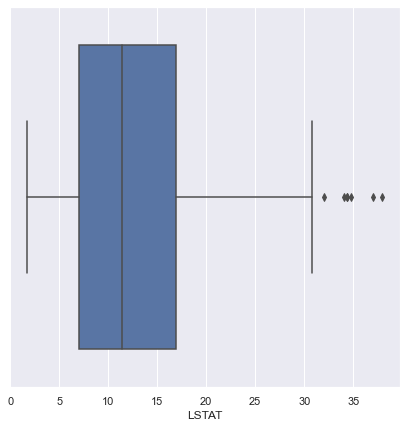

In [159]:
plt.figure(figsize=(7,7))
sns.boxplot(df.LSTAT)

### PREPARING THE DATA SET INCLUDING THE FEATURES THAT SATISFIES THE ASSUMPTION FOR LINEAR REGRESSION


IN OUR CASE WE WILL INCLUDE TWO FEATURES AS INDEPENDENT VARIABLE AND MEDV AS DEPENDENT VARIABLE 

In [160]:
## WE HAVE INDEPENDENT VARIABLES IN DATAFRAME X AND THE DEPENDENT VARIABLE IN Y
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])

Y=df['MEDV']

In [225]:
# SPLIT THE DATA SET INTP TRAINING AND TEST DATA

x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2)


### Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [215]:
lin_reg=LinearRegression()

In [226]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [245]:
y_pred=lin_reg.predict(x_test)

In [246]:
y_pred

array([1.86671606e+01, 3.04275692e+01, 2.26172332e+01, 2.84408214e+01,
       3.65886039e+01, 2.65005090e+01, 2.23719884e+01, 3.28686770e+01,
       1.97601034e+01, 2.03179689e+01, 2.24572588e+01, 2.20471162e+01,
       1.95279599e+01, 2.83886969e+01, 7.61824544e+00, 1.81302015e+01,
       4.51750815e+00, 1.93122040e+01, 2.26538598e+01, 3.59000826e+01,
       2.00363319e+01, 1.72358193e+01, 1.19818552e+01, 2.27004396e+01,
       2.42022166e+01, 1.23181295e+01, 2.10443832e+01, 2.66139497e+01,
       1.26445086e+01, 4.64014452e+00, 1.98646189e+01, 2.78815272e+01,
       2.35773239e+01, 2.16351320e+01, 1.28328717e+01, 2.78010561e+01,
       2.18387966e+01, 3.08204927e+01, 2.12867724e+01, 2.22625414e+01,
       3.30893043e+01, 1.31789288e+01, 1.46808862e+01, 8.37706021e+00,
       1.98888637e+01, 1.51233391e+01, 3.67130137e+01, 3.11759980e+01,
       3.05512557e+01, 2.07691266e+01, 2.91859838e+01, 2.96865388e+01,
       1.83258306e+01, 6.20795078e+00, 1.73039046e+01, 1.85431094e+01,
      

## Model evaluation
We will evaluate our model using RMSE and R2-score.

In [254]:
score=r2_score(y_test,y_pred)

In [255]:
score

0.5878858017370728

In [258]:
lin_reg.coef_

array([-0.63662724,  5.11185415])

In [259]:
lin_reg.intercept_

-1.776464653281316